# Interactive charts

In this notebook, we will show you create interactive technical analysis charts with Capitalgram. Interactive means you can easily pan and zoom over a larger time horizon, have tooltips and hovers available to show additional details.

We will

* [Build on the top of previous chapter](./plotting.html)

* Plot interactive charts using [Plotly](https://pypi.org/project/plotly/)

## About Plotly

Plotry and other interactive charts work in environments that can load the supporting JavaScript libraries on the page the charts are displayed. For example, currently [Plotly does not work on Google Colab Jupyter Notebooks](https://github.com/plotly/plotly.py/issues/3309).

## Setup

First let's install Trading Strategy package, the package dependencies and initialise our dataset client.
This might take 5 minutes in a fresh environment.

In [1]:
from tradingstrategy.client import Client
client = await Client.create_jupyter_lite_client(api_key=globals().get("api_key",None))
if client==None:
    api_key=await input("Please enter an api key then re-run the notebook")


No existing Trading Strategy configuration found in /home/pyodide/.tradingstrategy/settings.json. Making config from keyword parameters.
Testing out API key: secret-token:tradingstra
The server replied accepted our API key and sent the following greetings:
Server version: 0.1
Message of the day: Han shot first
The API key setup complete.


## Fetch data

Let's download 1 day (24h) candles to all trading pairs. This dataset is several dozens of megabytes.
You should see a progress bar during the download.

In [7]:
from tradingstrategy.timebucket import TimeBucket

# Download all 24h candles as Parquet columnar data
all_candles = client.fetch_all_candles(TimeBucket.d30)
pair_universe=client.fetch_pair_universe()
exchanges=client.fetch_exchange_universe()

100%|##########| 32.0M/32.0M [00:00<00:00, 36.7MB/s]
100%|##########| 13.2M/13.2M [00:00<00:00, 44.9MB/s]
Missing HTTP response content-length header for download https://tradingstrategy.ai/api/exchange-universe, headers are ItemsView({'content-type': 'application/json'})
(Unknown total file size): 1.60MB [00:00, 9.83MB/s]


In [15]:
import pandas as pd

# Convert PyArrow table to Pandas format to continue working on it
all_candles_dataframe = all_candles.to_pandas()
pairs= pair_universe.to_pandas()

Let's pick one pair, ETH-USDC on PancakeSwap, from the dataset to analyse.

In [51]:
from tradingstrategy.chain import ChainId
exchange_id=exchanges.get_by_chain_and_slug(ChainId.ethereum,"pancakeswap").exchange_id
# select the pair ID by the tokens used and the exchange
pair_id = pairs.query("token0_symbol == 'ETH' & token1_symbol=='USDC' & exchange_id==@exchange_id").iloc[0]['pair_id']
eth_usdc_pair: pd.DataFrame = all_candles_dataframe.query("pair_id == @pair_id")

print(f"PancakeSwap ETH-USDC has {len(eth_usdc_pair)} daily candles")

PancakeSwap ETH-USDC has 15 daily candles


## Plotting an interactive chart with Plotly

Next, let's try interactive charts. You can pan and zoom into interactive charts, making them easier to explore.

Plotly uses its JavaScript library to make the chart interactive on any HTML page.

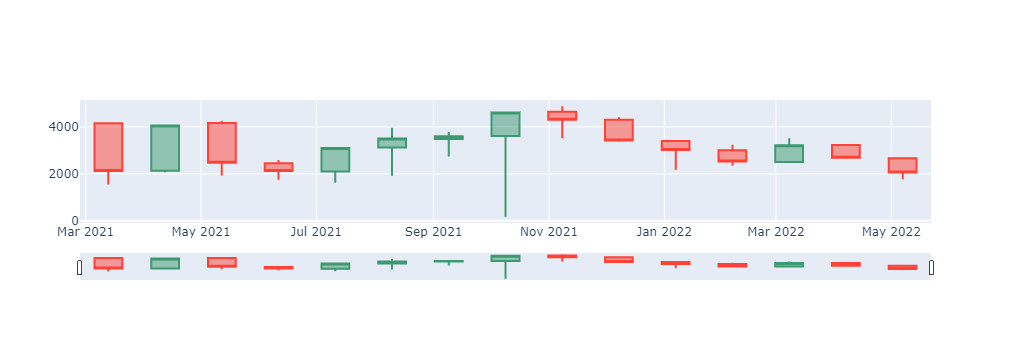

In [52]:
import plotly.graph_objects as go
from plotly.offline import iplot

fig = go.Figure(data=[go.Candlestick(x=eth_usdc_pair['timestamp'],
                open=eth_usdc_pair['open'],
                high=eth_usdc_pair['high'],
                low=eth_usdc_pair['low'],
                close=eth_usdc_pair['close'])])
iplot(fig)

Then we have OHCL chart. It is exactly thesame as candle chart, but renders candle wicks differently if you zoom in.

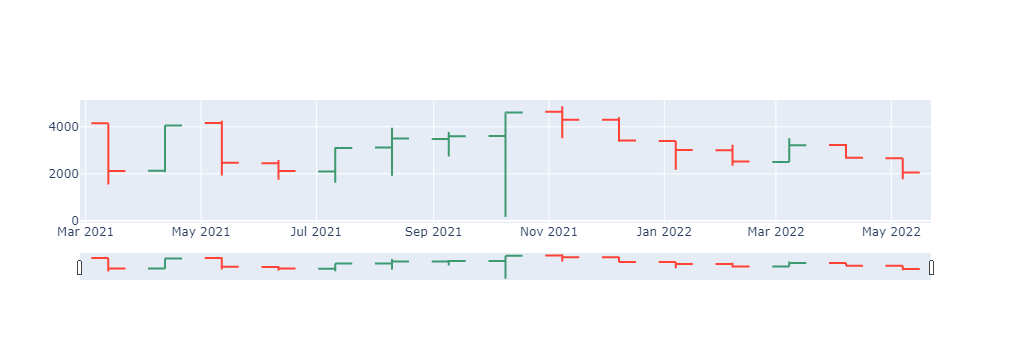

In [53]:
fig = go.Figure(data=[go.Ohlc(x=eth_usdc_pair['timestamp'],
                open=eth_usdc_pair['open'],
                high=eth_usdc_pair['high'],
                low=eth_usdc_pair['low'],
                close=eth_usdc_pair['close'])])

fig.show()

That's all for basic charts. Next, onwards to technical analysis.